<a href="https://colab.research.google.com/github/sejongmin/AI/blob/main/%EC%8B%A4%EC%8A%B52_1_%EB%8B%A4%EC%B8%B5_%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn

import numpy as np

In [ ]:
inputs = np.array([[0,0],[0,1],[1,0],[1,1]], dtype='float32')

targets = np.array([0,1,1,0], dtype='float32')

In [ ]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

dataset = TensorDataset(inputs, targets)
loader = DataLoader(dataset, batch_size=4)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(2, 2, bias = True) #input이 2개, output이 2개 인 선형 연산을 만들어라(은닉층)
        self.fc2 = nn.Linear(2, 1, bias = True) #input이 2개, output이 1개 인 선형 연산을 만들어라(출력층)
    def forward(self,x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

In [ ]:
model = Net()

In [ ]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [ ]:
for x,y in loader:
    preds = model(x)
    for i in range(4):
        print(f'Prediction: {preds[i].item():.2f} / Actual target: {targets[i]:.2f}')

Prediction: 0.38 / Actual target: 0.00
Prediction: 0.39 / Actual target: 1.00
Prediction: 0.38 / Actual target: 1.00
Prediction: 0.39 / Actual target: 0.00


In [ ]:
epochs = 5000
for i in range(epochs):
    optimizer.zero_grad()
    for x,y in loader:
        # Generate Prediction
        preds = model(x)
        # Get the loss and perform backpropagation
        loss = criterion(preds[:, 0], y)
        loss.backward() #gredient를 구하는 함수
        # Let's update the weights
        optimizer.step()
    #print(f"Epoch {i}/{epochs}: Loss: {loss}")

In [ ]:
for x,y in loader:
    preds = model(x)
    for i in range(4):
        print(f'Prediction: {preds[i].item():.2f} / Actual target: {targets[i]:.2f}')

Prediction: 0.00 / Actual target: 0.00
Prediction: 1.00 / Actual target: 1.00
Prediction: 1.00 / Actual target: 1.00
Prediction: 0.00 / Actual target: 0.00


In [ ]:
value = {}
def get_value(name):
    def hook(model, input, output):
        value[name] = output.detach()
    return hook

model.fc1.register_forward_hook(get_value('fc1'))

In [ ]:
hook = []
for x,y in dataset:
    preds = model(x)
    hook.append(torch.sigmoid(value['fc1']).detach())

    print(f'Prediction: {preds.item():.2f} / Actual target: {y.item():.2f}')

Prediction: 0.00 / Actual target: 0.00
Prediction: 1.00 / Actual target: 1.00
Prediction: 1.00 / Actual target: 1.00
Prediction: 0.00 / Actual target: 0.00


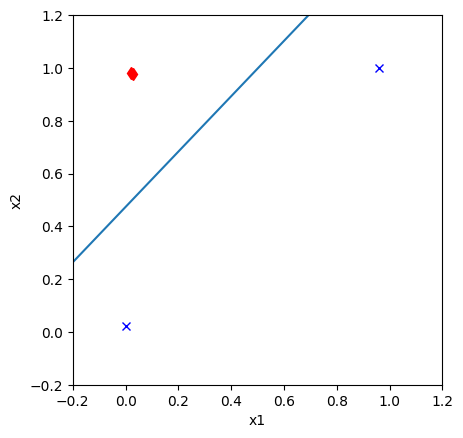

In [ ]:
import matplotlib.pyplot as plt

x1_tmp = np.arange(-0.2,1.3,0.1)
w_tmp = model.get_parameter('fc2.weight').detach().numpy()
w0_tmp = model.get_parameter('fc2.bias').detach().numpy()
x2_tmp = (-w_tmp[0][0]*x1_tmp-w0_tmp)/w_tmp[0][1]
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(len(inputs)):
    if targets[i] == 1:
        plt.plot(hook[i][0],hook[i][1],'bx')
    else:
        plt.plot(hook[i][0],hook[i][1],'rd')
plt.plot(x1_tmp,x2_tmp)
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.xlabel('x1')
plt.ylabel('x2')
ax.set_aspect('equal')
plt.show()